Epoch [1/20], Loss: 1.0765, Accuracy: 0.4296
Epoch [2/20], Loss: 0.9384, Accuracy: 0.9014
Epoch [3/20], Loss: 0.8051, Accuracy: 0.9648
Epoch [4/20], Loss: 0.6613, Accuracy: 0.9859
Epoch [5/20], Loss: 0.5244, Accuracy: 0.9859
Epoch [6/20], Loss: 0.4025, Accuracy: 0.9859
Epoch [7/20], Loss: 0.2865, Accuracy: 0.9718
Epoch [8/20], Loss: 0.1975, Accuracy: 0.9859
Epoch [9/20], Loss: 0.1474, Accuracy: 0.9859
Epoch [10/20], Loss: 0.1060, Accuracy: 0.9859
Epoch [11/20], Loss: 0.0813, Accuracy: 0.9930
Epoch [12/20], Loss: 0.0690, Accuracy: 1.0000
Epoch [13/20], Loss: 0.0526, Accuracy: 1.0000
Epoch [14/20], Loss: 0.0427, Accuracy: 1.0000
Epoch [15/20], Loss: 0.0386, Accuracy: 1.0000
Epoch [16/20], Loss: 0.0355, Accuracy: 1.0000
Epoch [17/20], Loss: 0.0259, Accuracy: 1.0000
Epoch [18/20], Loss: 0.0254, Accuracy: 1.0000
Epoch [19/20], Loss: 0.0245, Accuracy: 1.0000
Epoch [20/20], Loss: 0.0195, Accuracy: 1.0000
Test Accuracy: 1.0000


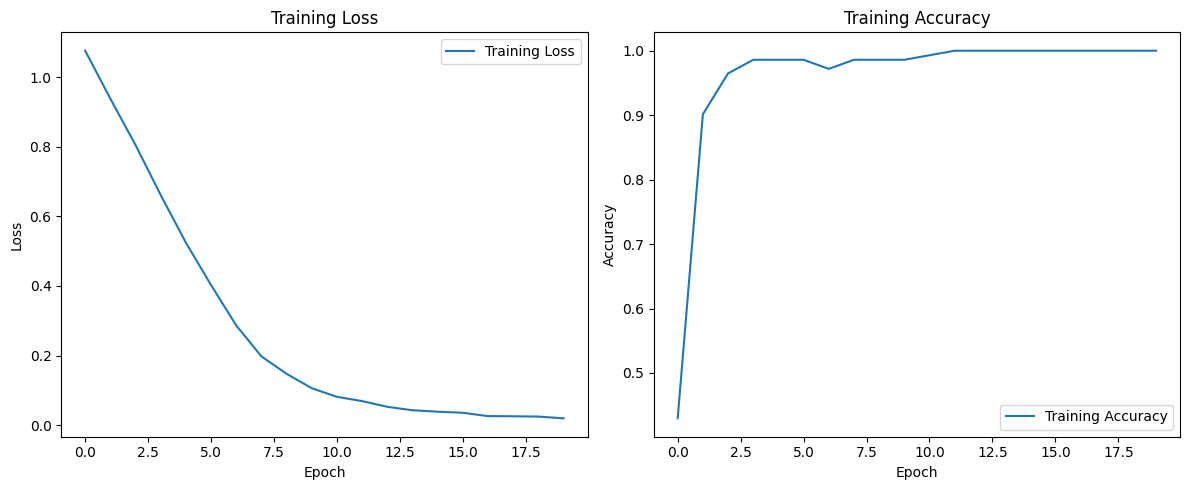

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# 加载数据集
def load_data():
    data = load_wine()
    X = data.data
    y = data.target
    return X, y

# 数据预处理
def preprocess_data(X, y):
    # 数据标准化
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # 转换为 PyTorch 张量
    X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.long)
    
    return X_tensor, y_tensor

# 构建 MLP 模型
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# 训练模型
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    losses = []
    accuracies = []
    
    for epoch in range(num_epochs):
        epoch_loss = 0
        correct = 0
        total = 0
        
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
        
        epoch_loss /= len(train_loader)
        epoch_accuracy = correct / total
        
        losses.append(epoch_loss)
        accuracies.append(epoch_accuracy)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')
    
    return losses, accuracies

# 评估模型
def test_model(model, test_loader):
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for inputs, targets in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
    
    accuracy = correct / total
    print(f'Test Accuracy: {accuracy:.4f}')
    return accuracy

# 绘制训练损失和精度
def plot_training_history(losses, accuracies):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(losses, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(accuracies, label='Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig("training_loss_and_accuracy.png")


# 主函数
def main():
    # 加载数据
    X, y = load_data()
    
    # 数据预处理
    X_tensor, y_tensor = preprocess_data(X, y)
    
    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
    
    # 创建 DataLoader
    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    # 定义模型、损失函数和优化器
    input_size = X.shape[1]
    hidden_size = 100
    output_size = 3
    model = MLP(input_size, hidden_size, output_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # 训练模型
    losses, accuracies = train_model(model, train_loader, criterion, optimizer, num_epochs=20)
    
    # 评估模型
    test_accuracy = test_model(model, test_loader)
    
    # 绘制训练损失和精度
    plot_training_history(losses, accuracies)

if __name__ == "__main__":
    main()

Epoch [1/20], Loss: 1.0890, Accuracy: 0.3380
Epoch [2/20], Loss: 0.9709, Accuracy: 0.7042
Epoch [3/20], Loss: 0.8626, Accuracy: 0.8873
Epoch [4/20], Loss: 0.7703, Accuracy: 0.9296
Epoch [5/20], Loss: 0.6798, Accuracy: 0.9437
Epoch [6/20], Loss: 0.6029, Accuracy: 0.9577
Epoch [7/20], Loss: 0.5482, Accuracy: 0.9577
Epoch [8/20], Loss: 0.4776, Accuracy: 0.9577
Epoch [9/20], Loss: 0.4253, Accuracy: 0.9577
Epoch [10/20], Loss: 0.3761, Accuracy: 0.9577
Epoch [11/20], Loss: 0.3383, Accuracy: 0.9577
Epoch [12/20], Loss: 0.2927, Accuracy: 0.9718
Epoch [13/20], Loss: 0.2609, Accuracy: 0.9859
Epoch [14/20], Loss: 0.2398, Accuracy: 0.9859
Epoch [15/20], Loss: 0.2157, Accuracy: 0.9930
Epoch [16/20], Loss: 0.1919, Accuracy: 0.9930
Epoch [17/20], Loss: 0.1814, Accuracy: 0.9930
Epoch [18/20], Loss: 0.1662, Accuracy: 0.9930
Epoch [19/20], Loss: 0.1622, Accuracy: 0.9930
Epoch [20/20], Loss: 0.1383, Accuracy: 0.9930
Test Accuracy: 1.0000


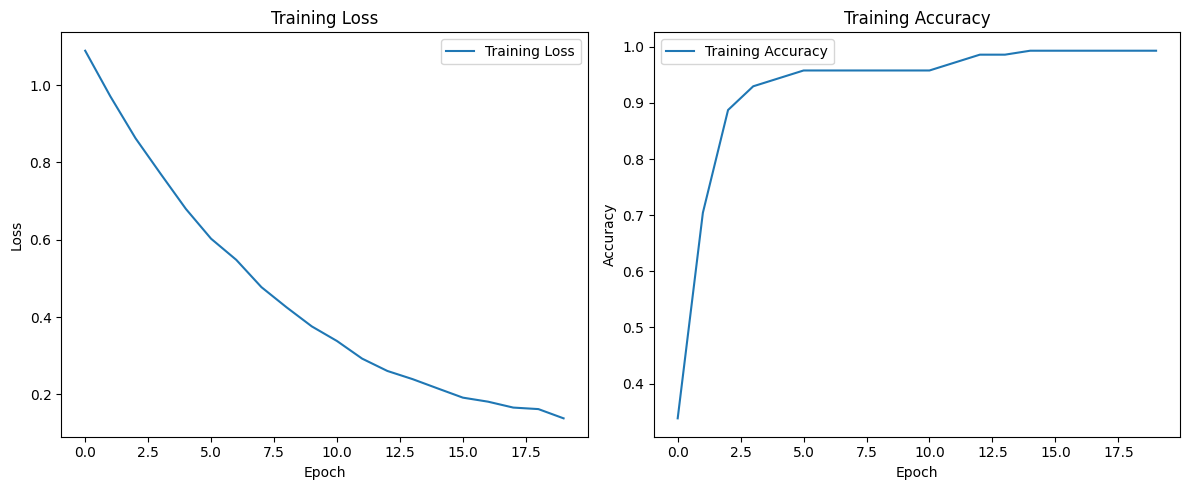

In [7]:
#配置 1：1 个隐藏层（修改MLP类）
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# 加载数据集
def load_data():
    data = load_wine()
    X = data.data
    y = data.target
    return X, y

# 数据预处理
def preprocess_data(X, y):
    # 数据标准化
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # 转换为 PyTorch 张量
    X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.long)
    
    return X_tensor, y_tensor

# 构建 MLP 模型
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        #self.fc2 = nn.Linear(hidden_size, hidden_size)# 删掉fc2层，直接从fc1连接输出层
        self.fc2 = nn.Linear(hidden_size, output_size)# 原fc3改为fc2
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        #x = self.relu(x)
        #x = self.fc3(x)
        return x

# 训练模型
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    losses = []
    accuracies = []
    
    for epoch in range(num_epochs):
        epoch_loss = 0
        correct = 0
        total = 0
        
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
        
        epoch_loss /= len(train_loader)
        epoch_accuracy = correct / total
        
        losses.append(epoch_loss)
        accuracies.append(epoch_accuracy)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')
    
    return losses, accuracies

# 评估模型
def test_model(model, test_loader):
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for inputs, targets in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
    
    accuracy = correct / total
    print(f'Test Accuracy: {accuracy:.4f}')
    return accuracy

# 绘制训练损失和精度
def plot_training_history(losses, accuracies):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(losses, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(accuracies, label='Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig("training_loss_and_accuracy.png")


# 主函数
def main():
    # 加载数据
    X, y = load_data()
    
    # 数据预处理
    X_tensor, y_tensor = preprocess_data(X, y)
    
    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
    
    # 创建 DataLoader
    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    # 定义模型、损失函数和优化器
    input_size = X.shape[1]
    hidden_size = 100
    output_size = 3
    model = MLP(input_size, hidden_size, output_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # 训练模型
    losses, accuracies = train_model(model, train_loader, criterion, optimizer, num_epochs=20)
    
    # 评估模型
    test_accuracy = test_model(model, test_loader)
    
    # 绘制训练损失和精度
    plot_training_history(losses, accuracies)

if __name__ == "__main__":
    main()

Epoch [1/20], Loss: 1.0540, Accuracy: 0.4155
Epoch [2/20], Loss: 0.9386, Accuracy: 0.6408
Epoch [3/20], Loss: 0.7687, Accuracy: 0.8239
Epoch [4/20], Loss: 0.5829, Accuracy: 0.9225
Epoch [5/20], Loss: 0.3850, Accuracy: 0.9718
Epoch [6/20], Loss: 0.2366, Accuracy: 0.9718
Epoch [7/20], Loss: 0.1289, Accuracy: 0.9859
Epoch [8/20], Loss: 0.0759, Accuracy: 0.9859
Epoch [9/20], Loss: 0.0515, Accuracy: 0.9930
Epoch [10/20], Loss: 0.0322, Accuracy: 0.9930
Epoch [11/20], Loss: 0.0242, Accuracy: 0.9930
Epoch [12/20], Loss: 0.0176, Accuracy: 0.9930
Epoch [13/20], Loss: 0.0142, Accuracy: 1.0000
Epoch [14/20], Loss: 0.0118, Accuracy: 1.0000
Epoch [15/20], Loss: 0.0093, Accuracy: 1.0000
Epoch [16/20], Loss: 0.0084, Accuracy: 1.0000
Epoch [17/20], Loss: 0.0062, Accuracy: 1.0000
Epoch [18/20], Loss: 0.0055, Accuracy: 1.0000
Epoch [19/20], Loss: 0.0053, Accuracy: 1.0000
Epoch [20/20], Loss: 0.0035, Accuracy: 1.0000
Test Accuracy: 1.0000


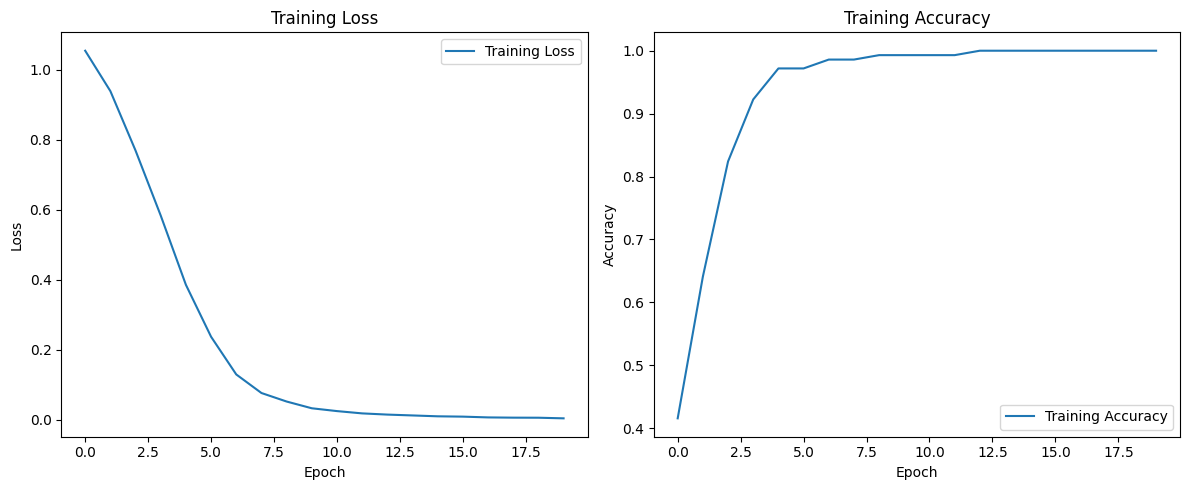

In [10]:
#配置 2：3 个隐藏层（修改MLP类）
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# 加载数据集
def load_data():
    data = load_wine()
    X = data.data
    y = data.target
    return X, y

# 数据预处理
def preprocess_data(X, y):
    # 数据标准化
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # 转换为 PyTorch 张量
    X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.long)
    
    return X_tensor, y_tensor

# 构建 MLP 模型
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)  # 新增隐藏层
        self.fc4 = nn.Linear(hidden_size, output_size)  # 输出层改为fc4
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)  # 新增隐藏层前向传播
        x = self.relu(x)
        x = self.fc4(x)
        return x

# 训练模型
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    losses = []
    accuracies = []
    
    for epoch in range(num_epochs):
        epoch_loss = 0
        correct = 0
        total = 0
        
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
        
        epoch_loss /= len(train_loader)
        epoch_accuracy = correct / total
        
        losses.append(epoch_loss)
        accuracies.append(epoch_accuracy)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')
    
    return losses, accuracies

# 评估模型
def test_model(model, test_loader):
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for inputs, targets in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
    
    accuracy = correct / total
    print(f'Test Accuracy: {accuracy:.4f}')
    return accuracy

# 绘制训练损失和精度
def plot_training_history(losses, accuracies):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(losses, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(accuracies, label='Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig("training_loss_and_accuracy.png")


# 主函数
def main():
    # 加载数据
    X, y = load_data()
    
    # 数据预处理
    X_tensor, y_tensor = preprocess_data(X, y)
    
    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
    
    # 创建 DataLoader
    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    # 定义模型、损失函数和优化器
    input_size = X.shape[1]
    hidden_size = 100
    output_size = 3
    model = MLP(input_size, hidden_size, output_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # 训练模型
    losses, accuracies = train_model(model, train_loader, criterion, optimizer, num_epochs=20)
    
    # 评估模型
    test_accuracy = test_model(model, test_loader)
    
    # 绘制训练损失和精度
    plot_training_history(losses, accuracies)

if __name__ == "__main__":
    main()

Epoch [1/20], Loss: 1.0896, Accuracy: 0.3451
Epoch [2/20], Loss: 1.0698, Accuracy: 0.4014
Epoch [3/20], Loss: 1.0456, Accuracy: 0.4014
Epoch [4/20], Loss: 1.0192, Accuracy: 0.4648
Epoch [5/20], Loss: 0.9932, Accuracy: 0.7817
Epoch [6/20], Loss: 0.9643, Accuracy: 0.7465
Epoch [7/20], Loss: 0.9324, Accuracy: 0.6408
Epoch [8/20], Loss: 0.9101, Accuracy: 0.5775
Epoch [9/20], Loss: 0.8688, Accuracy: 0.6549
Epoch [10/20], Loss: 0.8254, Accuracy: 0.8380
Epoch [11/20], Loss: 0.7842, Accuracy: 0.9366
Epoch [12/20], Loss: 0.7392, Accuracy: 0.9366
Epoch [13/20], Loss: 0.6889, Accuracy: 0.9437
Epoch [14/20], Loss: 0.6399, Accuracy: 0.9437
Epoch [15/20], Loss: 0.5936, Accuracy: 0.9437
Epoch [16/20], Loss: 0.5459, Accuracy: 0.9437
Epoch [17/20], Loss: 0.5149, Accuracy: 0.9366
Epoch [18/20], Loss: 0.4776, Accuracy: 0.9366
Epoch [19/20], Loss: 0.4528, Accuracy: 0.9507
Epoch [20/20], Loss: 0.4021, Accuracy: 0.9507
Test Accuracy: 0.9444


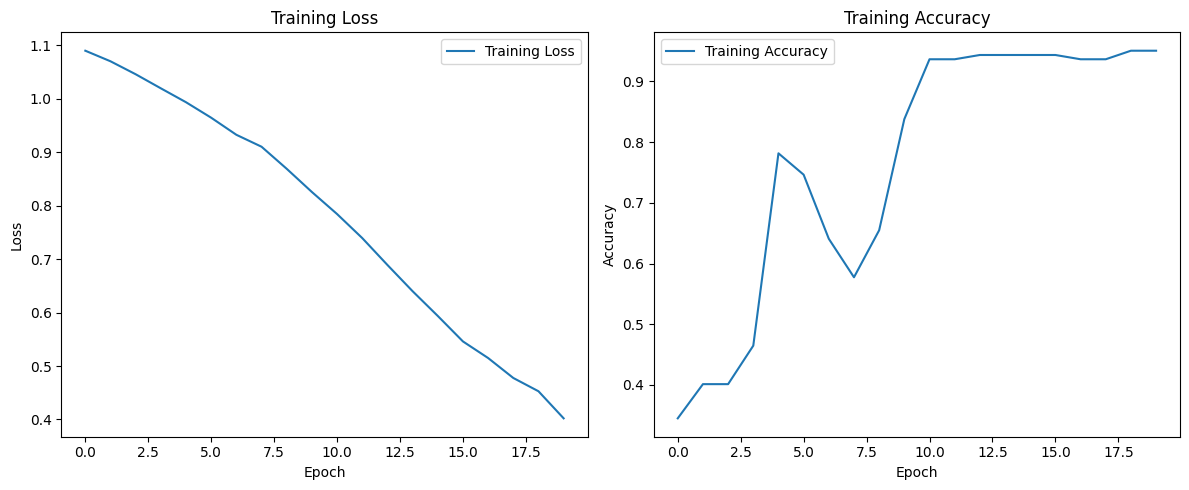

In [11]:
#配置 A：Sigmoid 激活函数（修改MLP类）
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# 加载数据集
def load_data():
    data = load_wine()
    X = data.data
    y = data.target
    return X, y

# 数据预处理
def preprocess_data(X, y):
    # 数据标准化
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # 转换为 PyTorch 张量
    X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.long)
    
    return X_tensor, y_tensor

# 构建 MLP 模型
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# 训练模型
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    losses = []
    accuracies = []
    
    for epoch in range(num_epochs):
        epoch_loss = 0
        correct = 0
        total = 0
        
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
        
        epoch_loss /= len(train_loader)
        epoch_accuracy = correct / total
        
        losses.append(epoch_loss)
        accuracies.append(epoch_accuracy)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')
    
    return losses, accuracies

# 评估模型
def test_model(model, test_loader):
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for inputs, targets in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
    
    accuracy = correct / total
    print(f'Test Accuracy: {accuracy:.4f}')
    return accuracy

# 绘制训练损失和精度
def plot_training_history(losses, accuracies):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(losses, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(accuracies, label='Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig("training_loss_and_accuracy.png")


# 主函数
def main():
    # 加载数据
    X, y = load_data()
    
    # 数据预处理
    X_tensor, y_tensor = preprocess_data(X, y)
    
    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
    
    # 创建 DataLoader
    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    # 定义模型、损失函数和优化器
    input_size = X.shape[1]
    hidden_size = 100
    output_size = 3
    model = MLP(input_size, hidden_size, output_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # 训练模型
    losses, accuracies = train_model(model, train_loader, criterion, optimizer, num_epochs=20)
    
    # 评估模型
    test_accuracy = test_model(model, test_loader)
    
    # 绘制训练损失和精度
    plot_training_history(losses, accuracies)

if __name__ == "__main__":
    main()

Epoch [1/20], Loss: 0.9347, Accuracy: 0.6690
Epoch [2/20], Loss: 0.6166, Accuracy: 0.9366
Epoch [3/20], Loss: 0.4186, Accuracy: 0.9577
Epoch [4/20], Loss: 0.2943, Accuracy: 0.9648
Epoch [5/20], Loss: 0.2106, Accuracy: 0.9718
Epoch [6/20], Loss: 0.1679, Accuracy: 0.9718
Epoch [7/20], Loss: 0.1259, Accuracy: 0.9789
Epoch [8/20], Loss: 0.0963, Accuracy: 0.9859
Epoch [9/20], Loss: 0.0819, Accuracy: 0.9930
Epoch [10/20], Loss: 0.0704, Accuracy: 0.9930
Epoch [11/20], Loss: 0.0709, Accuracy: 0.9930
Epoch [12/20], Loss: 0.0542, Accuracy: 0.9930
Epoch [13/20], Loss: 0.0455, Accuracy: 0.9930
Epoch [14/20], Loss: 0.0394, Accuracy: 0.9930
Epoch [15/20], Loss: 0.0358, Accuracy: 0.9930
Epoch [16/20], Loss: 0.0351, Accuracy: 1.0000
Epoch [17/20], Loss: 0.0295, Accuracy: 1.0000
Epoch [18/20], Loss: 0.0311, Accuracy: 1.0000
Epoch [19/20], Loss: 0.0310, Accuracy: 1.0000
Epoch [20/20], Loss: 0.0272, Accuracy: 1.0000
Test Accuracy: 1.0000


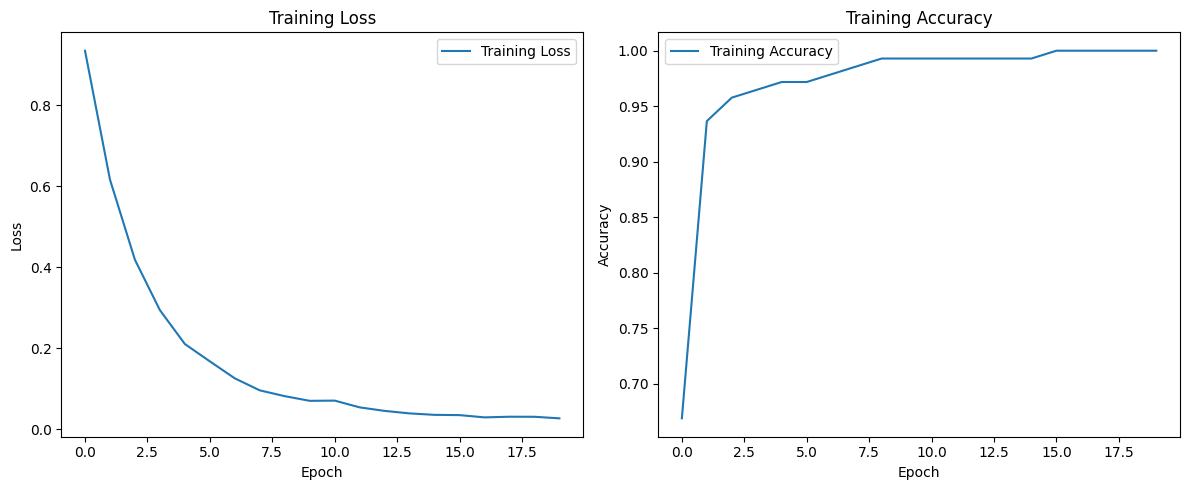

In [12]:
#配置 B：Tanh 激活函数（修改MLP类）
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# 加载数据集
def load_data():
    data = load_wine()
    X = data.data
    y = data.target
    return X, y

# 数据预处理
def preprocess_data(X, y):
    # 数据标准化
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # 转换为 PyTorch 张量
    X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.long)
    
    return X_tensor, y_tensor

# 构建 MLP 模型
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.Tanh()  # 替换为Tanh
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# 训练模型
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    losses = []
    accuracies = []
    
    for epoch in range(num_epochs):
        epoch_loss = 0
        correct = 0
        total = 0
        
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
        
        epoch_loss /= len(train_loader)
        epoch_accuracy = correct / total
        
        losses.append(epoch_loss)
        accuracies.append(epoch_accuracy)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')
    
    return losses, accuracies

# 评估模型
def test_model(model, test_loader):
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for inputs, targets in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
    
    accuracy = correct / total
    print(f'Test Accuracy: {accuracy:.4f}')
    return accuracy

# 绘制训练损失和精度
def plot_training_history(losses, accuracies):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(losses, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(accuracies, label='Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig("training_loss_and_accuracy.png")


# 主函数
def main():
    # 加载数据
    X, y = load_data()
    
    # 数据预处理
    X_tensor, y_tensor = preprocess_data(X, y)
    
    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
    
    # 创建 DataLoader
    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    # 定义模型、损失函数和优化器
    input_size = X.shape[1]
    hidden_size = 100
    output_size = 3
    model = MLP(input_size, hidden_size, output_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # 训练模型
    losses, accuracies = train_model(model, train_loader, criterion, optimizer, num_epochs=20)
    
    # 评估模型
    test_accuracy = test_model(model, test_loader)
    
    # 绘制训练损失和精度
    plot_training_history(losses, accuracies)

if __name__ == "__main__":
    main()

Epoch [1/40], Loss: 1.0625, Accuracy: 0.5282
Epoch [2/40], Loss: 0.9274, Accuracy: 0.8944
Epoch [3/40], Loss: 0.7951, Accuracy: 0.9648
Epoch [4/40], Loss: 0.6408, Accuracy: 0.9718
Epoch [5/40], Loss: 0.5039, Accuracy: 0.9648
Epoch [6/40], Loss: 0.3830, Accuracy: 0.9859
Epoch [7/40], Loss: 0.2707, Accuracy: 0.9859
Epoch [8/40], Loss: 0.2039, Accuracy: 0.9859
Epoch [9/40], Loss: 0.1444, Accuracy: 0.9859
Epoch [10/40], Loss: 0.1189, Accuracy: 0.9930
Epoch [11/40], Loss: 0.0829, Accuracy: 0.9930
Epoch [12/40], Loss: 0.0672, Accuracy: 0.9930
Epoch [13/40], Loss: 0.0539, Accuracy: 0.9930
Epoch [14/40], Loss: 0.0513, Accuracy: 0.9930
Epoch [15/40], Loss: 0.0394, Accuracy: 1.0000
Epoch [16/40], Loss: 0.0357, Accuracy: 1.0000
Epoch [17/40], Loss: 0.0360, Accuracy: 1.0000
Epoch [18/40], Loss: 0.0329, Accuracy: 1.0000
Epoch [19/40], Loss: 0.0246, Accuracy: 1.0000
Epoch [20/40], Loss: 0.0210, Accuracy: 1.0000
Epoch [21/40], Loss: 0.0223, Accuracy: 1.0000
Epoch [22/40], Loss: 0.0174, Accuracy: 1.00

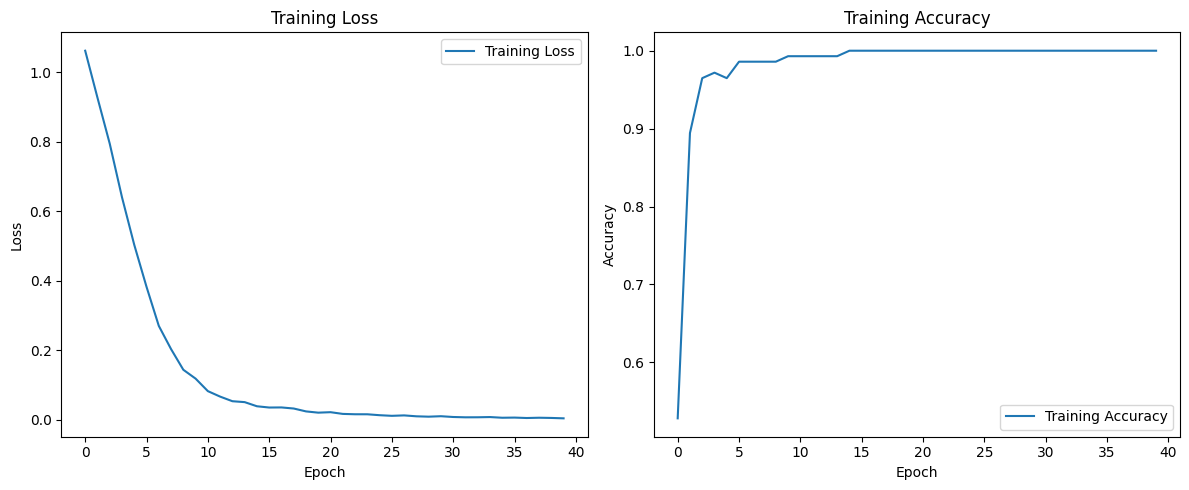

In [13]:
#调整训练轮数（epoch）
#配置 1：num_epochs=40；
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# 加载数据集
def load_data():
    data = load_wine()
    X = data.data
    y = data.target
    return X, y

# 数据预处理
def preprocess_data(X, y):
    # 数据标准化
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # 转换为 PyTorch 张量
    X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.long)
    
    return X_tensor, y_tensor

# 构建 MLP 模型
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# 训练模型
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    losses = []
    accuracies = []
    
    for epoch in range(num_epochs):
        epoch_loss = 0
        correct = 0
        total = 0
        
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
        
        epoch_loss /= len(train_loader)
        epoch_accuracy = correct / total
        
        losses.append(epoch_loss)
        accuracies.append(epoch_accuracy)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')
    
    return losses, accuracies

# 评估模型
def test_model(model, test_loader):
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for inputs, targets in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
    
    accuracy = correct / total
    print(f'Test Accuracy: {accuracy:.4f}')
    return accuracy

# 绘制训练损失和精度
def plot_training_history(losses, accuracies):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(losses, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(accuracies, label='Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig("training_loss_and_accuracy.png")


# 主函数
def main():
    # 加载数据
    X, y = load_data()
    
    # 数据预处理
    X_tensor, y_tensor = preprocess_data(X, y)
    
    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
    
    # 创建 DataLoader
    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    # 定义模型、损失函数和优化器
    input_size = X.shape[1]
    hidden_size = 100
    output_size = 3
    model = MLP(input_size, hidden_size, output_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # 训练模型
    losses, accuracies = train_model(model, train_loader, criterion, optimizer, num_epochs=40)
    
    # 评估模型
    test_accuracy = test_model(model, test_loader)
    
    # 绘制训练损失和精度
    plot_training_history(losses, accuracies)

if __name__ == "__main__":
    main()

Epoch [1/60], Loss: 1.0687, Accuracy: 0.3732
Epoch [2/60], Loss: 0.9337, Accuracy: 0.8803
Epoch [3/60], Loss: 0.8042, Accuracy: 0.9577
Epoch [4/60], Loss: 0.6719, Accuracy: 0.9648
Epoch [5/60], Loss: 0.5315, Accuracy: 0.9718
Epoch [6/60], Loss: 0.4098, Accuracy: 0.9718
Epoch [7/60], Loss: 0.2874, Accuracy: 0.9789
Epoch [8/60], Loss: 0.2149, Accuracy: 0.9859
Epoch [9/60], Loss: 0.1464, Accuracy: 0.9930
Epoch [10/60], Loss: 0.1112, Accuracy: 0.9930
Epoch [11/60], Loss: 0.0877, Accuracy: 0.9930
Epoch [12/60], Loss: 0.0671, Accuracy: 0.9930
Epoch [13/60], Loss: 0.0620, Accuracy: 0.9930
Epoch [14/60], Loss: 0.0520, Accuracy: 0.9930
Epoch [15/60], Loss: 0.0390, Accuracy: 0.9930
Epoch [16/60], Loss: 0.0313, Accuracy: 1.0000
Epoch [17/60], Loss: 0.0291, Accuracy: 1.0000
Epoch [18/60], Loss: 0.0258, Accuracy: 1.0000
Epoch [19/60], Loss: 0.0215, Accuracy: 1.0000
Epoch [20/60], Loss: 0.0197, Accuracy: 1.0000
Epoch [21/60], Loss: 0.0163, Accuracy: 1.0000
Epoch [22/60], Loss: 0.0166, Accuracy: 1.00

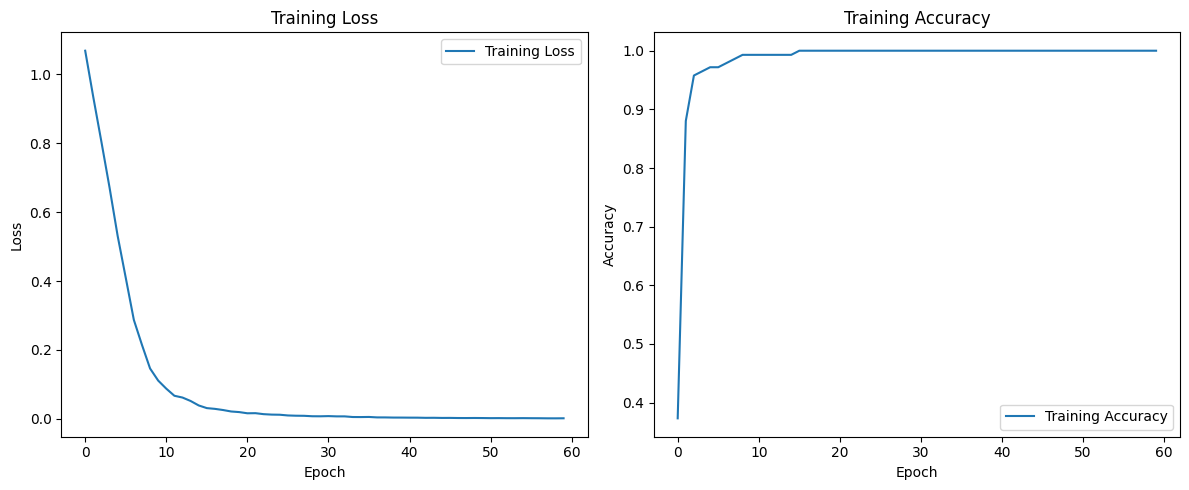

In [14]:
#调整训练轮数（epoch）
#配置 2：num_epochs=60；
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# 加载数据集
def load_data():
    data = load_wine()
    X = data.data
    y = data.target
    return X, y

# 数据预处理
def preprocess_data(X, y):
    # 数据标准化
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # 转换为 PyTorch 张量
    X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.long)
    
    return X_tensor, y_tensor

# 构建 MLP 模型
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# 训练模型
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    losses = []
    accuracies = []
    
    for epoch in range(num_epochs):
        epoch_loss = 0
        correct = 0
        total = 0
        
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
        
        epoch_loss /= len(train_loader)
        epoch_accuracy = correct / total
        
        losses.append(epoch_loss)
        accuracies.append(epoch_accuracy)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')
    
    return losses, accuracies

# 评估模型
def test_model(model, test_loader):
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for inputs, targets in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
    
    accuracy = correct / total
    print(f'Test Accuracy: {accuracy:.4f}')
    return accuracy

# 绘制训练损失和精度
def plot_training_history(losses, accuracies):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(losses, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(accuracies, label='Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig("training_loss_and_accuracy.png")


# 主函数
def main():
    # 加载数据
    X, y = load_data()
    
    # 数据预处理
    X_tensor, y_tensor = preprocess_data(X, y)
    
    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
    
    # 创建 DataLoader
    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    # 定义模型、损失函数和优化器
    input_size = X.shape[1]
    hidden_size = 100
    output_size = 3
    model = MLP(input_size, hidden_size, output_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # 训练模型
    losses, accuracies = train_model(model, train_loader, criterion, optimizer, num_epochs=60)
    
    # 评估模型
    test_accuracy = test_model(model, test_loader)
    
    # 绘制训练损失和精度
    plot_training_history(losses, accuracies)

if __name__ == "__main__":
    main()

Epoch [1/100], Loss: 1.0162, Accuracy: 0.6268
Epoch [2/100], Loss: 0.8573, Accuracy: 0.9437
Epoch [3/100], Loss: 0.7036, Accuracy: 0.9718
Epoch [4/100], Loss: 0.5438, Accuracy: 0.9648
Epoch [5/100], Loss: 0.4070, Accuracy: 0.9718
Epoch [6/100], Loss: 0.2953, Accuracy: 0.9718
Epoch [7/100], Loss: 0.2136, Accuracy: 0.9789
Epoch [8/100], Loss: 0.1583, Accuracy: 0.9789
Epoch [9/100], Loss: 0.1156, Accuracy: 0.9859
Epoch [10/100], Loss: 0.0972, Accuracy: 1.0000
Epoch [11/100], Loss: 0.0813, Accuracy: 1.0000
Epoch [12/100], Loss: 0.0579, Accuracy: 1.0000
Epoch [13/100], Loss: 0.0533, Accuracy: 1.0000
Epoch [14/100], Loss: 0.0452, Accuracy: 1.0000
Epoch [15/100], Loss: 0.0381, Accuracy: 1.0000
Epoch [16/100], Loss: 0.0294, Accuracy: 1.0000
Epoch [17/100], Loss: 0.0261, Accuracy: 1.0000
Epoch [18/100], Loss: 0.0231, Accuracy: 1.0000
Epoch [19/100], Loss: 0.0204, Accuracy: 1.0000
Epoch [20/100], Loss: 0.0198, Accuracy: 1.0000
Epoch [21/100], Loss: 0.0177, Accuracy: 1.0000
Epoch [22/100], Loss: 

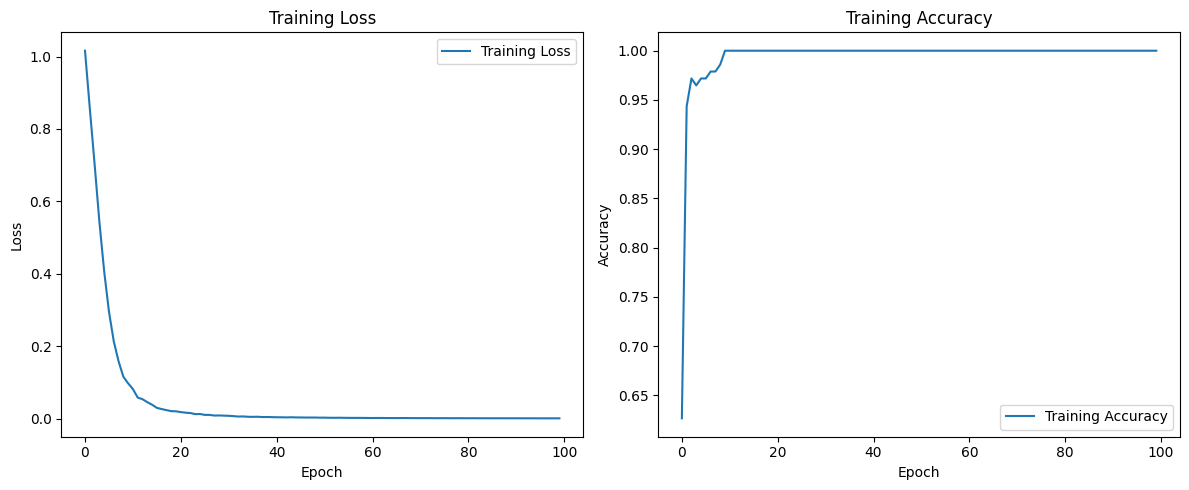

In [15]:
#调整训练轮数（epoch）
#配置 3：num_epochs=100；
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# 加载数据集
def load_data():
    data = load_wine()
    X = data.data
    y = data.target
    return X, y

# 数据预处理
def preprocess_data(X, y):
    # 数据标准化
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # 转换为 PyTorch 张量
    X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.long)
    
    return X_tensor, y_tensor

# 构建 MLP 模型
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# 训练模型
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    losses = []
    accuracies = []
    
    for epoch in range(num_epochs):
        epoch_loss = 0
        correct = 0
        total = 0
        
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
        
        epoch_loss /= len(train_loader)
        epoch_accuracy = correct / total
        
        losses.append(epoch_loss)
        accuracies.append(epoch_accuracy)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')
    
    return losses, accuracies

# 评估模型
def test_model(model, test_loader):
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for inputs, targets in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
    
    accuracy = correct / total
    print(f'Test Accuracy: {accuracy:.4f}')
    return accuracy

# 绘制训练损失和精度
def plot_training_history(losses, accuracies):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(losses, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(accuracies, label='Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig("training_loss_and_accuracy.png")


# 主函数
def main():
    # 加载数据
    X, y = load_data()
    
    # 数据预处理
    X_tensor, y_tensor = preprocess_data(X, y)
    
    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
    
    # 创建 DataLoader
    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    # 定义模型、损失函数和优化器
    input_size = X.shape[1]
    hidden_size = 100
    output_size = 3
    model = MLP(input_size, hidden_size, output_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # 训练模型
    losses, accuracies = train_model(model, train_loader, criterion, optimizer, num_epochs=100)
    
    # 评估模型
    test_accuracy = test_model(model, test_loader)
    
    # 绘制训练损失和精度
    plot_training_history(losses, accuracies)

if __name__ == "__main__":
    main()

Epoch [1/200], Loss: 1.0515, Accuracy: 0.6197
Epoch [2/200], Loss: 0.8898, Accuracy: 0.9155
Epoch [3/200], Loss: 0.7548, Accuracy: 0.9437
Epoch [4/200], Loss: 0.5944, Accuracy: 0.9507
Epoch [5/200], Loss: 0.4663, Accuracy: 0.9648
Epoch [6/200], Loss: 0.3403, Accuracy: 0.9718
Epoch [7/200], Loss: 0.2463, Accuracy: 0.9859
Epoch [8/200], Loss: 0.1870, Accuracy: 0.9859
Epoch [9/200], Loss: 0.1364, Accuracy: 0.9859
Epoch [10/200], Loss: 0.1015, Accuracy: 0.9859
Epoch [11/200], Loss: 0.0797, Accuracy: 0.9930
Epoch [12/200], Loss: 0.0669, Accuracy: 0.9930
Epoch [13/200], Loss: 0.0632, Accuracy: 0.9930
Epoch [14/200], Loss: 0.0460, Accuracy: 0.9930
Epoch [15/200], Loss: 0.0370, Accuracy: 0.9930
Epoch [16/200], Loss: 0.0346, Accuracy: 1.0000
Epoch [17/200], Loss: 0.0304, Accuracy: 1.0000
Epoch [18/200], Loss: 0.0258, Accuracy: 1.0000
Epoch [19/200], Loss: 0.0243, Accuracy: 1.0000
Epoch [20/200], Loss: 0.0206, Accuracy: 1.0000
Epoch [21/200], Loss: 0.0195, Accuracy: 1.0000
Epoch [22/200], Loss: 

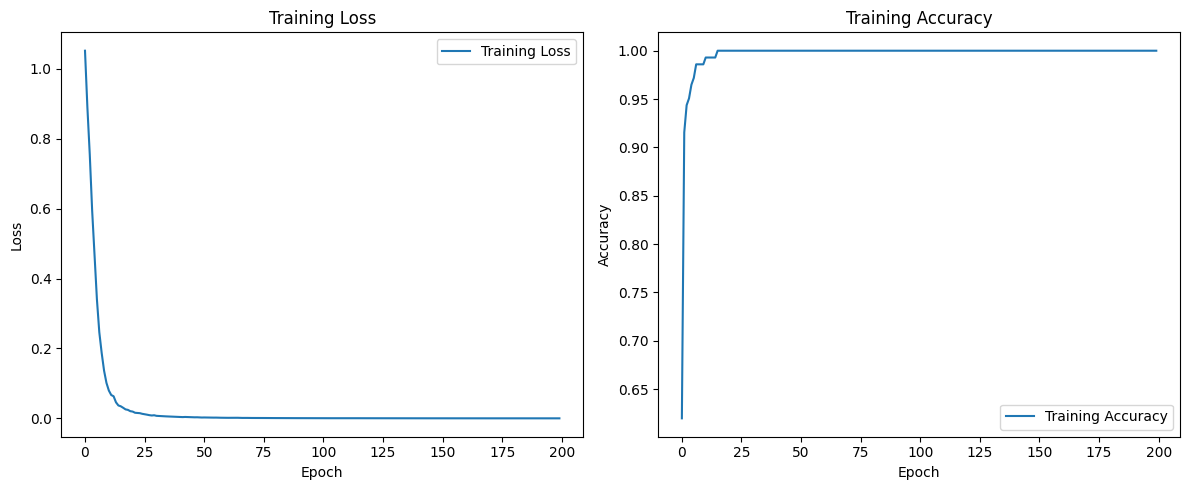

In [16]:
#调整训练轮数（epoch）
#配置 4：num_epochs=200；
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# 加载数据集
def load_data():
    data = load_wine()
    X = data.data
    y = data.target
    return X, y

# 数据预处理
def preprocess_data(X, y):
    # 数据标准化
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # 转换为 PyTorch 张量
    X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.long)
    
    return X_tensor, y_tensor

# 构建 MLP 模型
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# 训练模型
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    losses = []
    accuracies = []
    
    for epoch in range(num_epochs):
        epoch_loss = 0
        correct = 0
        total = 0
        
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
        
        epoch_loss /= len(train_loader)
        epoch_accuracy = correct / total
        
        losses.append(epoch_loss)
        accuracies.append(epoch_accuracy)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')
    
    return losses, accuracies

# 评估模型
def test_model(model, test_loader):
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for inputs, targets in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
    
    accuracy = correct / total
    print(f'Test Accuracy: {accuracy:.4f}')
    return accuracy

# 绘制训练损失和精度
def plot_training_history(losses, accuracies):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(losses, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(accuracies, label='Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig("training_loss_and_accuracy.png")


# 主函数
def main():
    # 加载数据
    X, y = load_data()
    
    # 数据预处理
    X_tensor, y_tensor = preprocess_data(X, y)
    
    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
    
    # 创建 DataLoader
    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    # 定义模型、损失函数和优化器
    input_size = X.shape[1]
    hidden_size = 100
    output_size = 3
    model = MLP(input_size, hidden_size, output_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # 训练模型
    losses, accuracies = train_model(model, train_loader, criterion, optimizer, num_epochs=200)
    
    # 评估模型
    test_accuracy = test_model(model, test_loader)
    
    # 绘制训练损失和精度
    plot_training_history(losses, accuracies)

if __name__ == "__main__":
    main()